In [10]:
library(mco)
library("IRdisplay")
set.seed(125)

In [2]:
df = read.csv("../../data/store.csv", header = TRUE, sep=";")
days = weekdays(as.Date(df[251:257,1]))
all = df[251:257,2]
female = df[251:257,3]
male = df[251:257,4]
young = df[251:257,5]
adult = df[251:257,6]

In [3]:
tail(df,7)

,date,all,female,male,young,adult,weather,maxtemp,RH,maxwind
,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<int>
251,2013-12-15,4974,2299,2390,2680,2294,Sunny,11,83,35
252,2013-12-16,3228,1442,1606,1625,1603,Sunny,10,87,32
253,2013-12-17,3191,1427,1627,1688,1503,Rain,11,90,24
254,2013-12-18,4153,2035,1880,2208,1945,Rain,10,93,0
255,2013-12-19,4307,2043,2028,2282,2025,Rain,12,86,74
256,2013-12-20,4660,2207,2227,2441,2219,Sunny,9,69,0
257,2013-12-21,6193,2894,2967,3115,3078,Sunny,9,68,0


In [4]:
pred=list(all=all, female=female, male=male, young=young, adult=adult) # pred 
D = length(pred$all) + length(pred$female) + length(pred$male) + length(pred$young) + length(pred$adult) # size of the solution

In [5]:
# Evaluation Functions and Report Function: ------------------------------
source("../eval_functions.R", encoding="UTF-8")

In [6]:
# nsga2 Initial Settings: -------------------------
lower=rep(0,D) # lower bounds
upper=rep(1,D) #  upper bounds
  
m=2 # there are 2 objectives
popSize=20
maxGen=100

output="image" # Pareto Graph

## Objetivo 3

In [7]:
# nsga2 Objective 3: -------------------------
evalM=function(x) c(sum(round(x)), -profitObj1(round(x)))

G=nsga2(fn=evalM,idim=D,odim=m, lower.bounds=lower,upper.bounds=upper,popsize=popSize,generations=1:maxGen)
  
# show best individuals:
I=which(G[[maxGen]]$pareto.optimal)
for(i in I) {
    x=round(G[[maxGen]]$par[i,],digits=0); cat(x)
    cat(" f=(",round(evalM(x)[1],2),",",abs(round(evalM(x)[2],2)),")", "\n",sep="")
}
  
# create file with Pareto front evolution:
if (output == "pdf") {
    filePath = "nsga_pareto_graph.pdf"
    pdf(file=filePath,paper="special",height=5,width=5)
} else {
    filePath = "nsga_pareto_graph.jpg"
    jpeg(filePath, width = 600, height = 600)
}
  
par(mar=c(4.0,4.0,0.1,0.1))
I=1:maxGen
for(i in I){ 
    G[[i]]$value[,2] <- abs(G[[i]]$value[,2])
    P=G[[i]]$value # objectives f1 and f2
    
    #color from light gray (75) to dark (1):
    COL=paste("gray",round(76-i*0.75),sep="")
    if(i==1) plot(P,xlim=c(0,35),ylim=c(0,3000), xlab="Campaigns",ylab="Profit",cex=1,col=COL)
    Pareto=P[G[[i]]$pareto.optimal,]
    
    # sort Pareto according to x axis:
    points(P,type="p",pch=1,cex=1,col=COL)
    if(is.matrix(Pareto)){ # if Pareto has more than 1 point
        I=sort.int(Pareto[,1],index.return=TRUE)
        Pareto=Pareto[I$ix,]
        lines(Pareto,type="l",cex=1,col=COL)
    }
}
dev.off()
  
lastGen <- G[[maxGen]]
index <- which.max(lastGen$value[,2])
sol <- round(lastGen$par[index,],digits=0)

0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 f=(3,682.95)
0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 f=(17,2093.7)
0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 f=(15,2044.54)
0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 f=(8,1393.29)
0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 f=(10,1623.43)
0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 f=(13,1916.88)
0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 f=(4,838.23)
0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 f=(4,838.23)
0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 f=(5,987.1)
0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 f=(5,987.1)
0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 f=(6,1133.38)
0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 f=(7,1270.

png 
  2

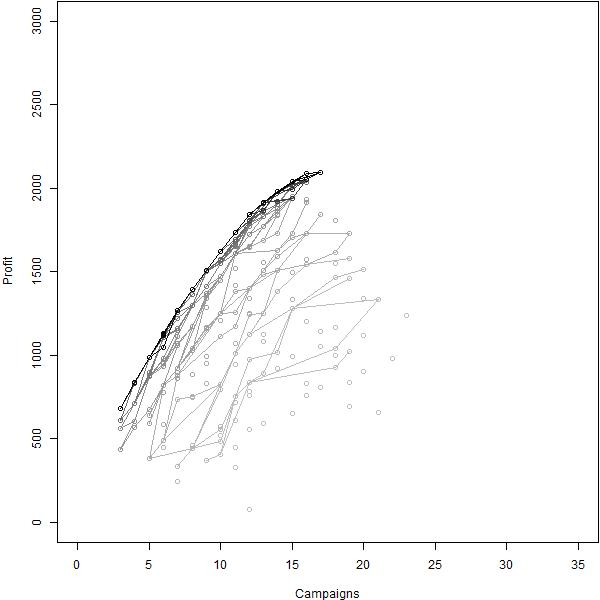

In [8]:
display_png(file=filePath)  

In [9]:
formatCampaigns(pred, sol, days)
totalSales <- sum(sales(pred, sol))
totalCosts <- sum(costs(pred, sol))
cat("Result with the highest profit: -------------------------\n")
cat("Total Sales:", totalSales, "€\n")
cat("Total Costs: -", totalCosts, "€\n")
cat("Total Profit:", totalSales - totalCosts, "€")

,campaign,domingo,segunda-feira,terça-feira,quarta-feira,quinta-feira,sexta-feira,sábado
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,all,N/A,N/A,N/A,N/A,N/A,N/A,+ 207.37 €
2,female,+ 148.87 €,N/A,N/A,+ 114.55 €,+ 115.59 €,+ 136.91 €,+ 226.22 €
3,male,+ 67.3 €,N/A,N/A,N/A,+ 41.96 €,N/A,+ 107.69 €
4,young,+ 7.2 €,N/A,N/A,N/A,N/A,N/A,N/A
5,adult,+ 155.28 €,+ 72.36 €,+ 60.36 €,+ 113.4 €,+ 123 €,+ 146.28 €,+ 249.36 €


Result with the highest profit: -------------------------
Total Sales: 4433.7 €
Total Costs: - 2340 €
Total Profit: 2093.7 €